In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

In [25]:
data = pd.read_csv("adult.data.csv")
data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
data.isnull().sum()

39                0
 State-gov        0
 77516            0
 Bachelors        0
 13               0
 Never-married    0
 Adm-clerical     0
 Not-in-family    0
 White            0
 Male             0
 2174             0
 0                0
 40               0
 United-States    0
 <=50K            0
dtype: int64

In [26]:
data.set_axis(['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income'], inplace=True, axis='columns')

In [27]:
data.shape

(32560, 15)

In [28]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [29]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# DATA VISUALIZATION

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

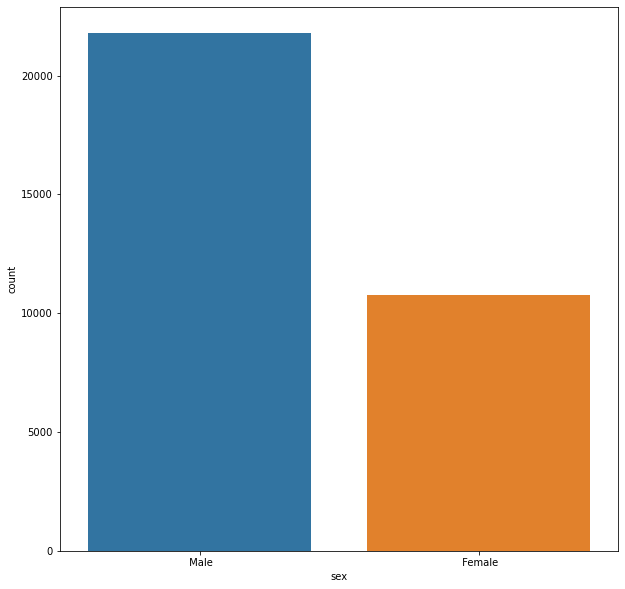

In [30]:
plt.figure(figsize=(10,10))
sns.countplot(data['sex'])

<AxesSubplot:xlabel='age', ylabel='Count'>

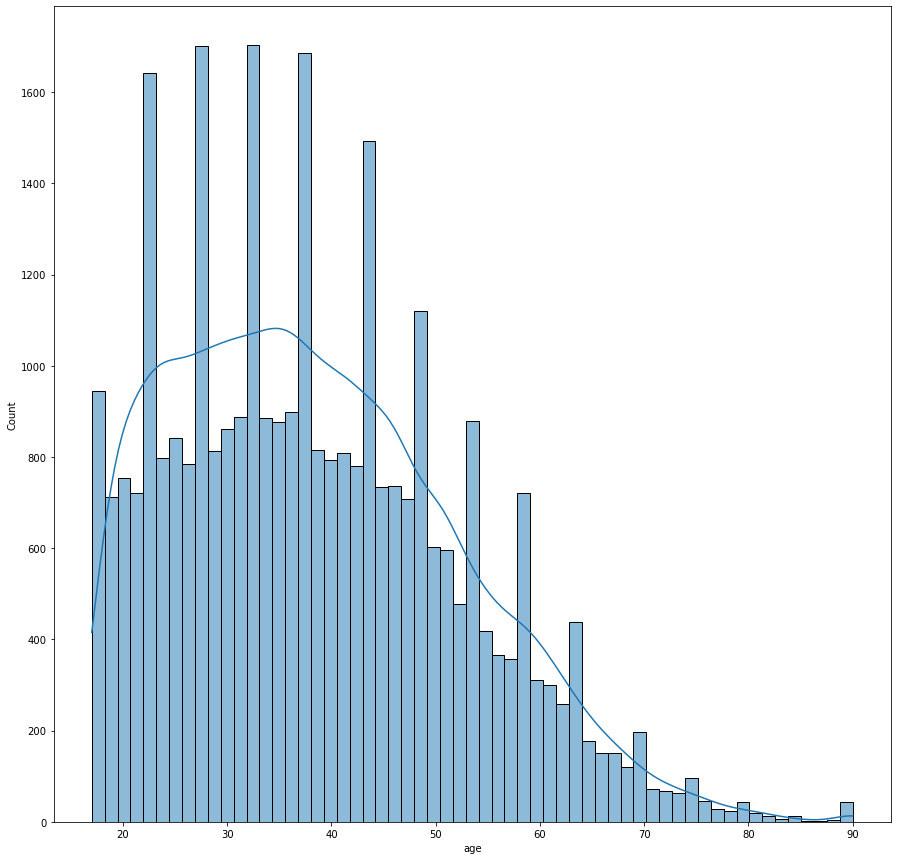

In [10]:
plt.figure(figsize=(15,15))
sns.histplot(data['age'], kde=True)

<AxesSubplot:xlabel='race', ylabel='count'>

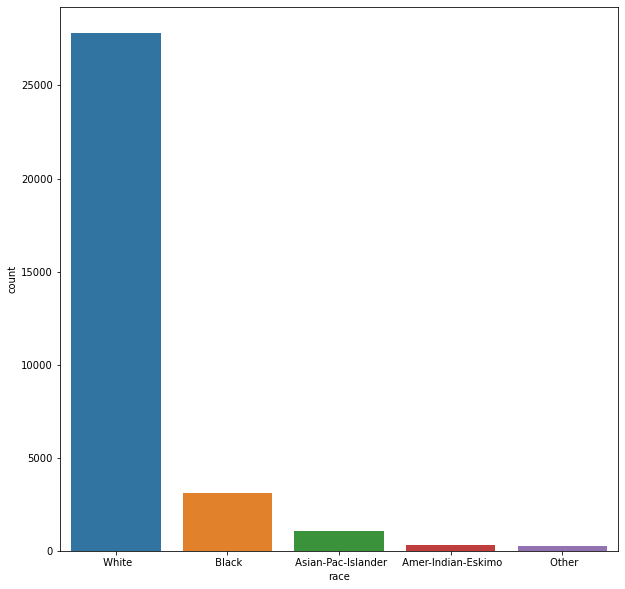

In [11]:
plt.figure(figsize=(10,10))
sns.countplot(x='race',data=data)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='workclass', ylabel='count'>

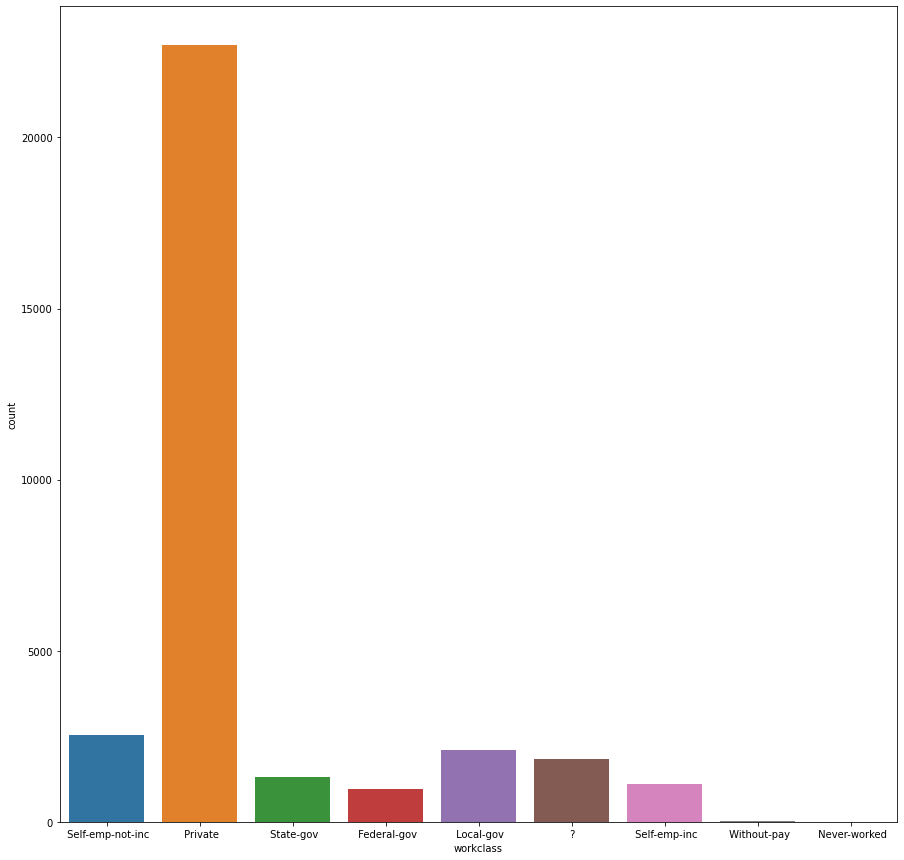

In [12]:
plt.figure(figsize=(15,15))
sns.countplot(data['workclass'])

# DATA PREPROCESSING

# Categorical Features 

# 1-Workclass
# 2-Education
# 3-marital_status
# 4-occupation
# 5-relationship
# 6-race
# 7-sex     
# 8-native_country
# 9-income

# Label Encoding

In [31]:
features = ['education','workclass','marital_status','occupation','relationship','race','sex','native_country']
le =LabelEncoder()
mappings = []
for feature in features:
    data[feature] = le.fit_transform(data[feature])
    le_mapping = dict(zip(le.classes_,le.transform(le.classes_)))
    mappings.append(le_mapping)
data.head()    

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,<=50K
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,<=50K
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,<=50K
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,<=50K
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,<=50K


In [32]:
data['income'] = le.fit_transform(data['income'])
print(le.classes_)
print(le.transform(le.classes_))

[' <=50K' ' >50K']
[0 1]


<AxesSubplot:>

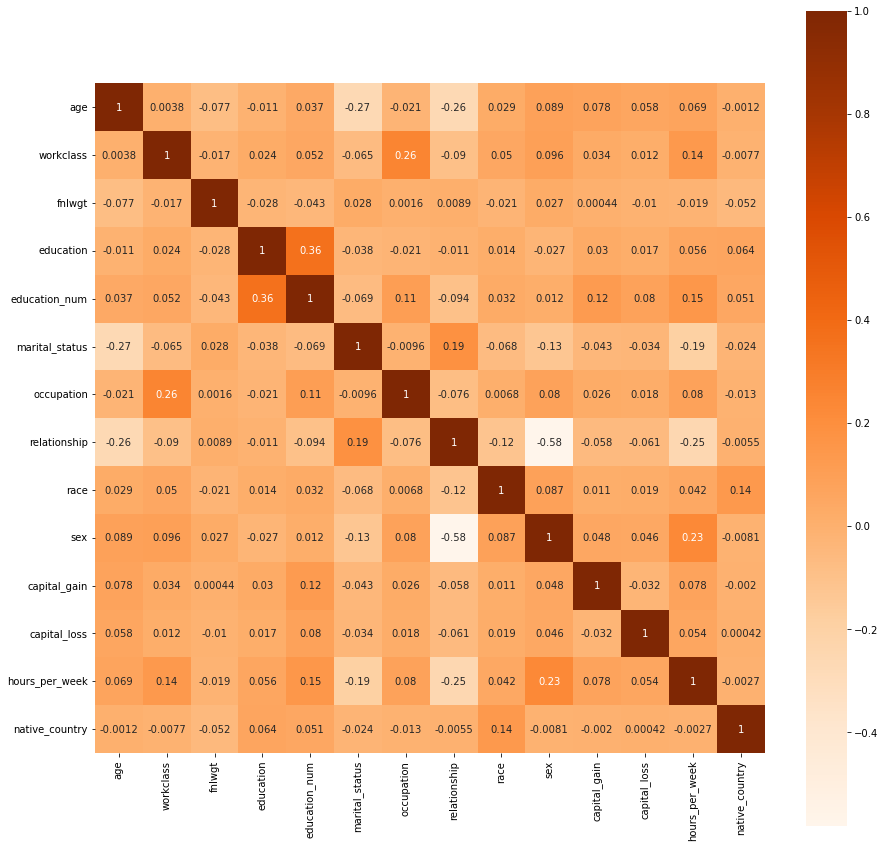

In [14]:
correlation = data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation,cmap='Oranges', cbar=True, annot=True, square=True, annot_kws={'size':10})

In [22]:
print(correlation['income'])

age               0.234039
workclass         0.051645
fnlwgt           -0.009481
education         0.079311
education_num     0.335182
marital_status   -0.199295
occupation        0.075448
relationship     -0.250924
race              0.071853
sex               0.215995
capital_gain      0.223333
capital_loss      0.150523
hours_per_week    0.229690
native_country    0.015845
income            1.000000
Name: income, dtype: float64


# Splitting data into target and feature columns

In [33]:
x = data.drop(['income'], axis=1)
y = data['income']

# Splitting data into train and test datasets

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1,stratify=y)

In [74]:
scaler = StandardScaler()

In [75]:
x_train_scaled = scaler.fit_transform(x_train)

In [76]:
x_test_scaled= scaler.fit_transform(x_test)

# Training the models

In [77]:
logreg = LogisticRegression(C=20)
svc = LinearSVC(C=20)

In [78]:
logreg2 = LogisticRegression(C=100)
svc2 = LinearSVC()

In [79]:
logreg.fit(x_train_scaled,y_train)

LogisticRegression(C=20)

In [80]:
svc.fit(x_train_scaled,y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=20)

# Model Evaluation

In [82]:
# Logistics Regression
prediction = logreg.predict(x_train_scaled).round()
score = accuracy_score(prediction, y_train)
print(f"Accuracy_score (training data) : {score}")

Accuracy_score (training data) : 0.8246519246519246


In [84]:
# LinearSVC
prediction = svc.predict(x_train_scaled).round()
score = accuracy_score(prediction, y_train)
print(f"Accuracy_score (training data) : {score}")

Accuracy_score (training data) : 0.811998361998362


In [86]:
logreg.fit(x_test_scaled,y_test)

LogisticRegression(C=20)

In [87]:
svc.fit(x_test_scaled,y_test)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=20)

In [88]:
# Logistics Regression
prediction = logreg.predict(x_test_scaled).round()
score = accuracy_score(prediction, y_test)
print(f"Accuracy_score (test data) : {score}")

Accuracy_score (test data) : 0.8251842751842752


In [90]:
# LinearSVC
prediction = svc.predict(x_test_scaled).round()
score = accuracy_score(prediction, y_test)
print(f"Accuracy_score (test data) : {score}")

Accuracy_score (test data) : 0.8234643734643735


In [91]:
logreg2.fit(x_train_scaled,y_train)

LogisticRegression(C=100)

In [92]:
svc2.fit(x_train_scaled,y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [93]:
# Logistics Regression
prediction2 = logreg2.predict(x_train_scaled)
score = accuracy_score(prediction2, y_train)
print(f"Accuracy_score (training data) : {score}")

Accuracy_score (training data) : 0.8246519246519246


In [95]:
# LinearSVC
prediction = svc2.predict(x_train_scaled).round()
score = accuracy_score(prediction, y_train)
print(f"Accuracy_score (training data) : {score}")

Accuracy_score (training data) : 0.8230958230958231


In [96]:
logreg2.fit(x_test_scaled,y_test)

LogisticRegression(C=100)

In [97]:
svc2.fit(x_test_scaled,y_test)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [99]:
# Logistics Regression
prediction2 = logreg2.predict(x_test_scaled).round()
score = accuracy_score(prediction2, y_test)
print(f"Accuracy_score (test data) : {score}")

Accuracy_score (test data) : 0.8251842751842752


In [100]:
# LinearSVC
prediction = svc2.predict(x_test_scaled).round()
score = accuracy_score(prediction, y_test)
print(f"Accuracy_score (test data) : {score}")

Accuracy_score (test data) : 0.8259213759213759
